In [36]:
import pandas as pd; pd.set_option('display.max_rows', 20); pd.set_option('display.max_columns', 1000); pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [37]:
df = pd.read_csv('train.csv')

In [38]:
def encoder(df):
    df['artist_count'] = df['artists'].str.split(';').apply(len)
    df.drop(columns=['track_id','key','track_name'],inplace=True)
    label_encoder = LabelEncoder()
    # Aplicar o Label Encoding na coluna 'artists'
    df['artists'] = label_encoder.fit_transform(df['artists'])

    # Aplicar o Label Encoding na coluna 'track_genre'
    df['track_genre'] = label_encoder.fit_transform(df['track_genre'])

    df['album_name'] = label_encoder.fit_transform(df['album_name'])

    df = pd.get_dummies(df, columns=['mode','explicit'])


In [39]:
encoder(df)

In [40]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['popularity_target'])
y = df['popularity_target']

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Acurácia do Random Forest: 0.805


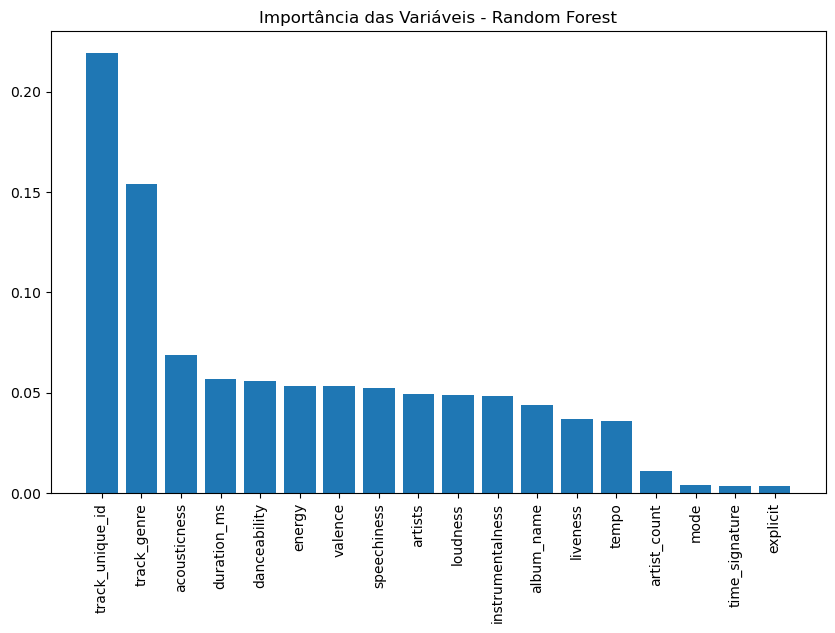

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=500,          # Número de árvores na floresta
    max_depth=15,              # Profundidade máxima de cada árvore
    min_samples_split=5,       # Número mínimo de amostras requeridas para dividir um nó
    min_samples_leaf=4,        # Número mínimo de amostras em um nó folha
    max_features='sqrt',       # Número de features consideradas para encontrar a melhor divisão
    bootstrap=True,            # Amostras com substituição (padrão)
    random_state=42,           # Para garantir reprodutibilidade
    class_weight='balanced',   # Para lidar com classes desbalanceadas
    n_jobs=-1                  # Usar todos os núcleos disponíveis para treinamento
)
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia do Random Forest: {accuracy_rf:.3f}")




# Importância das variáveis
importances_rf = rf_model.feature_importances_
sorted_indices_rf = np.argsort(importances_rf)[::-1]

# Plotar a importância das variáveis
plt.figure(figsize=(10, 6))
plt.title('Importância das Variáveis - Random Forest')
plt.bar(range(X_train.shape[1]), importances_rf[sorted_indices_rf], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices_rf], rotation=90)
plt.show()

In [43]:
df_teste = pd.read_csv('test.csv')

In [44]:
df_teste['artists'].fillna('a',inplace=True)
df_teste['album_name'].fillna('a',inplace=True)
df_teste['track_name'].fillna('a',inplace=True)

C:\Users\dudur\AppData\Local\Temp\ipykernel_2812\1448777613.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_teste['artists'].fillna('a',inplace=True)
C:\Users\dudur\AppData\Local\Temp\ipykernel_2812\1448777613.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [45]:
encoder(df_teste)

In [46]:
def preparar_envio(modelo, df_teste, arquivo_saida='submissionSimple.csv'):
    # Fazer previsões
    previsoes = modelo.predict(df_teste)

    # Adicionar as previsões ao DataFrame de teste
    df_teste['popularity_target'] = previsoes

    # Selecionar colunas necessárias para o envio
    df_envio = df_teste[['track_unique_id', 'popularity_target']]

    # Salvar o arquivo no formato correto
    df_envio.to_csv(arquivo_saida, index=False)
    print(f"Envio salvo como {arquivo_saida}.")

# Usar a função para preparar o envio
preparar_envio(rf_model, df_teste)

Envio salvo como submissionSimple.csv.
